# Try out the NVIDIA Medical Device Training Assistant

## Background 
Medical devices, such as surgical robots, are complex machines that require extensive training prior to safe use by clinicians and other Operating Room (OR) staff. Timely and accurate answers to medical device questions during and after training can improve the trust and satisfaction of device operators and improve efficiency and effectiveness of training. The medical device's "Instructions For Use" (IFU) is a manual that contains information about the usage of the device, but it is often difficult to find answers to questions efficiently due to its verbosity and technical language.

In this application, we show the capability of using Retrieval Augmented Generation (RAG) powered by NVIDIA NIMs to enhance that training experience by enabling clinicians and other OR staff to ask the IFU directly with their questions at any hour of any day. 

## Overview 
With this application, you will be able to use the `rag-playground` UI to interact with a RAG chain server consisting of the file loader, text splitter, embedding model, vector database, and LLM.

You can first upload your IFU (Instructions-For-Use) documents in the Knowledge Base. Then, use voice command to ask queries to the RAG regarding information in your IFU and get the answer back through the speakers with no interruption to your routine.

## Example Features

This example showcases conversational AI in a RAG pipeline.

The chain server stores the conversation history and knowledge base in a vector database and retrieves them at runtime to understand contextual queries.

The example supports ingestion of PDF and text (.txt, .md) files.

The documents are ingested in a dedicated document vector store.

The prompt for the example is tuned to act as a document chat bot.

To maintain the conversation history, the chain server stores the previously asked query and the model's generated answer as a text entry in a different and dedicated vector store for conversation history, `conv_store`.
Both of these vector stores are part of a LangChain [LCEL](https://python.langchain.com/docs/expression_language/) chain as LangChain Retrievers.
When the chain is invoked with a query, the query passes through both of the retrievers.
The retriever retrieves context from the document vector store and the closest-matching conversation history from conversation history vector store.
Afterward, the chunks are added into the LLM prompt as part of the chain.

|          Model          |        Embedding        |        Ranking (Optional)        | Framework | Vector Database |  File Types  |
| ----------------------- | ----------------------- | -------------------------------- | --------- | --------------- | ------------ |
| meta/llama3-70b-instruct | nvidia/nv-embedqa-e5-v5 | nvidia/nv-rerankqa-mistral-4b-v3 | LangChain | Milvus          | TXT, PDF, MD |

For more information, please see the [Medical Device Training Assistant documentation](https://github.com/NVIDIA/GenerativeAIExamples/tree/main/industries/healthcare/medical-device-training-assistant).

## Getting started

### Docker Compose version check 

Ensure the Docker Compose plugin version is v2.29.1 or higher.

In [ ]:
%%bash

# Make certain docker compose version is v2.29.1 or higher
docker compose version


> **Note:** If the version is lower than <b>v2.29.1</b> please run the cell bellow, otherwise skip to cloning the repository

In [ ]:
%%bash

sudo apt-get update
sudo apt-get install docker-compose-plugin

### Clone the repository and get all the API keys

#### Clone the repository

In [ ]:
%%bash

[ -d "GenerativeAIExamples" ] || git clone https://github.com/NVIDIA/GenerativeAIExamples.git

#### Get the API Keys

##### NVIDIA API key to access the API Catalog

Get an API key to access models in the API Catalog. You can use different model API endpoints with the same API key. [Follow these instuctions](https://docs.nvidia.com/ngc/gpu-cloud/ngc-user-guide/index.html#generating-service-api-key).

1. Navigate to [https://build.nvidia.com/explore/discover](https://build.nvidia.com/explore/discover).

2. Find the **Llama 3.1 70B Instruct** card and click the card.

3. Click **Get API Key**.

4. Click **Generate Key**.

5. Click **Copy Key** and then save the API key. The key begins with the letters ``nvapi-``.

##### NVIDIA NGC API key to access container registry

The NVIDIA NGC API key is required to log in to the NVIDIA container registry, nvcr.io, and to pull secure base container images used in this example. Refer to these instructions to [generate an NGC API key](https://docs.nvidia.com/ngc/gpu-cloud/ngc-user-guide/index.html#generating-api-key).




## Run the application

### Export the API keys

In [ ]:
import os

NVIDIA_API_KEY = input("Please enter your NVIDIA API key (nvapi-): ")
NGC_API_KEY=input("Please enter your NGC API key: ")
os.environ["NVIDIA_API_KEY"] = NVIDIA_API_KEY
os.environ["NGC_API_KEY"] = NGC_API_KEY

###  Change directory

In [ ]:
import os

current_path = os.getcwd()
last_part = os.path.basename(current_path)

if os.path.basename(os.getcwd()) != "medical-device-training-assistant":
    os.chdir("GenerativeAIExamples/industries/healthcare/medical-device-training-assistant")

os.getcwd()

### Build and start the application 
This might take a few minutes to run.

In [ ]:
%%bash

# Build and start the application
docker compose up -d --build

### Check the running containers

Confirm everything is running as it should be and is healthy.

The output should look like:

   ```
   CONTAINER ID   NAMES               STATUS
    281b8e171237   rag-playground      Up 8 minutes
    e0705f80da70   milvus-standalone   Up 8 minutes
    fd278ec06513   milvus-minio        Up 8 minutes (healthy)
    c99bba4f4019   milvus-etcd         Up 8 minutes (healthy)
    65ef4fa7ffa7   chain-server        Up 8 minutes
```

In [ ]:
%%bash

docker ps --format "table {{.ID}}\t{{.Names}}\t{{.Status}}"


## Using the interface

Go back to NVIDIA Brev console and access the playground via the link visible under deployement, as shown below :
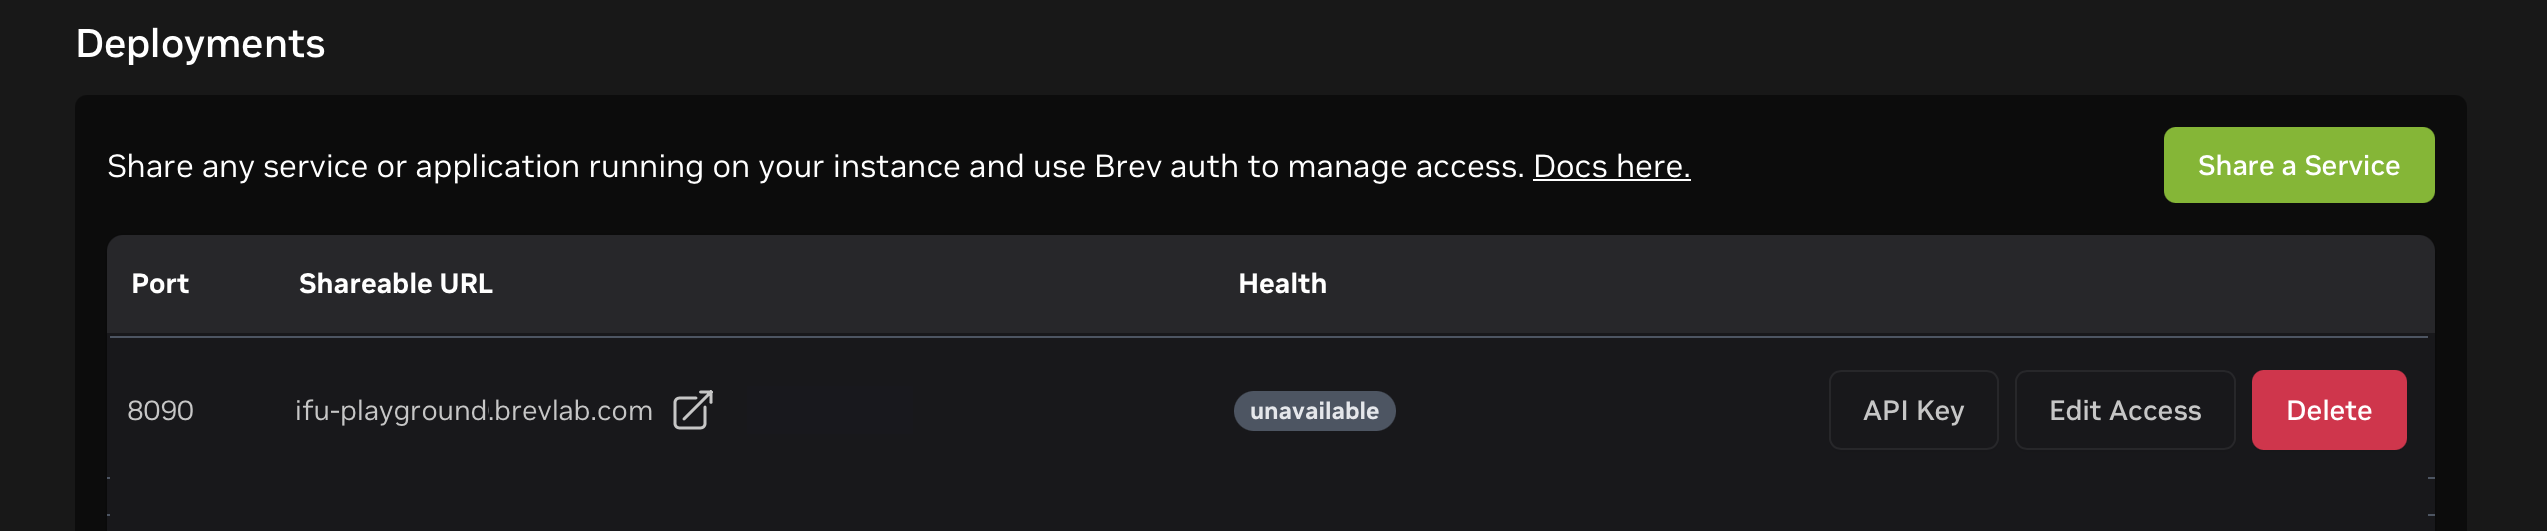



Once the interface is visible, you can click on Knowledge Base as shown below.

You can then Add File, to ingest your Instruction For Use document.

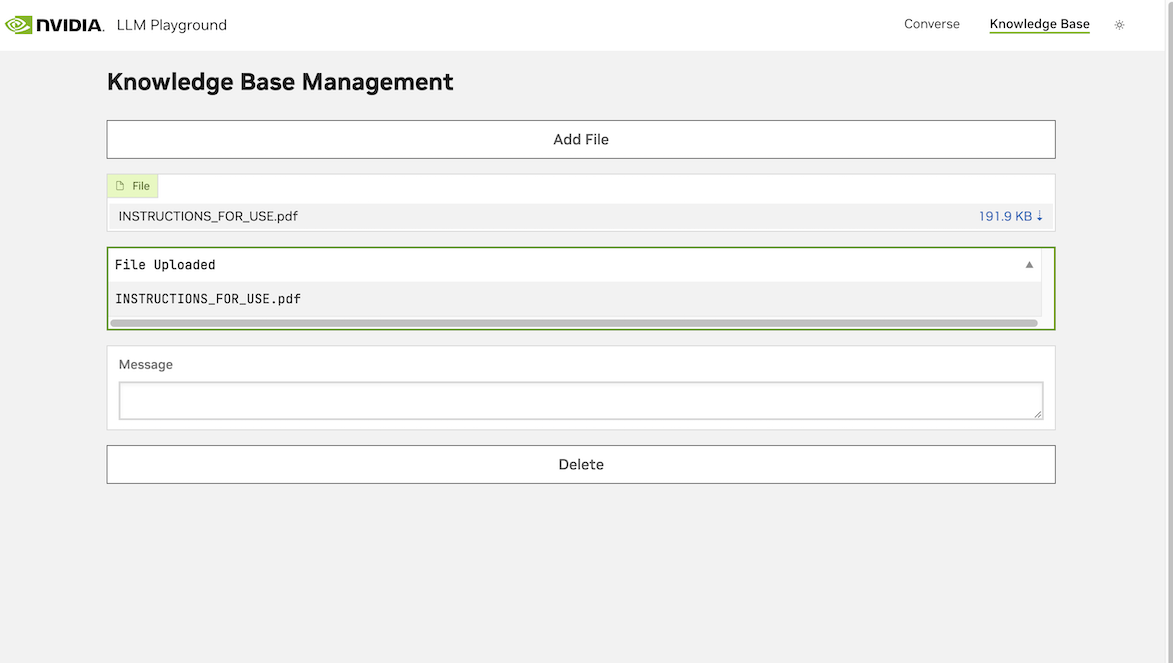

Now that your file is uploaded you can use Converse to ask the question.

> <b>Note: Do not forget to check "Use knowledge base" to be able to answer questions about the document that have been downloaded </b>

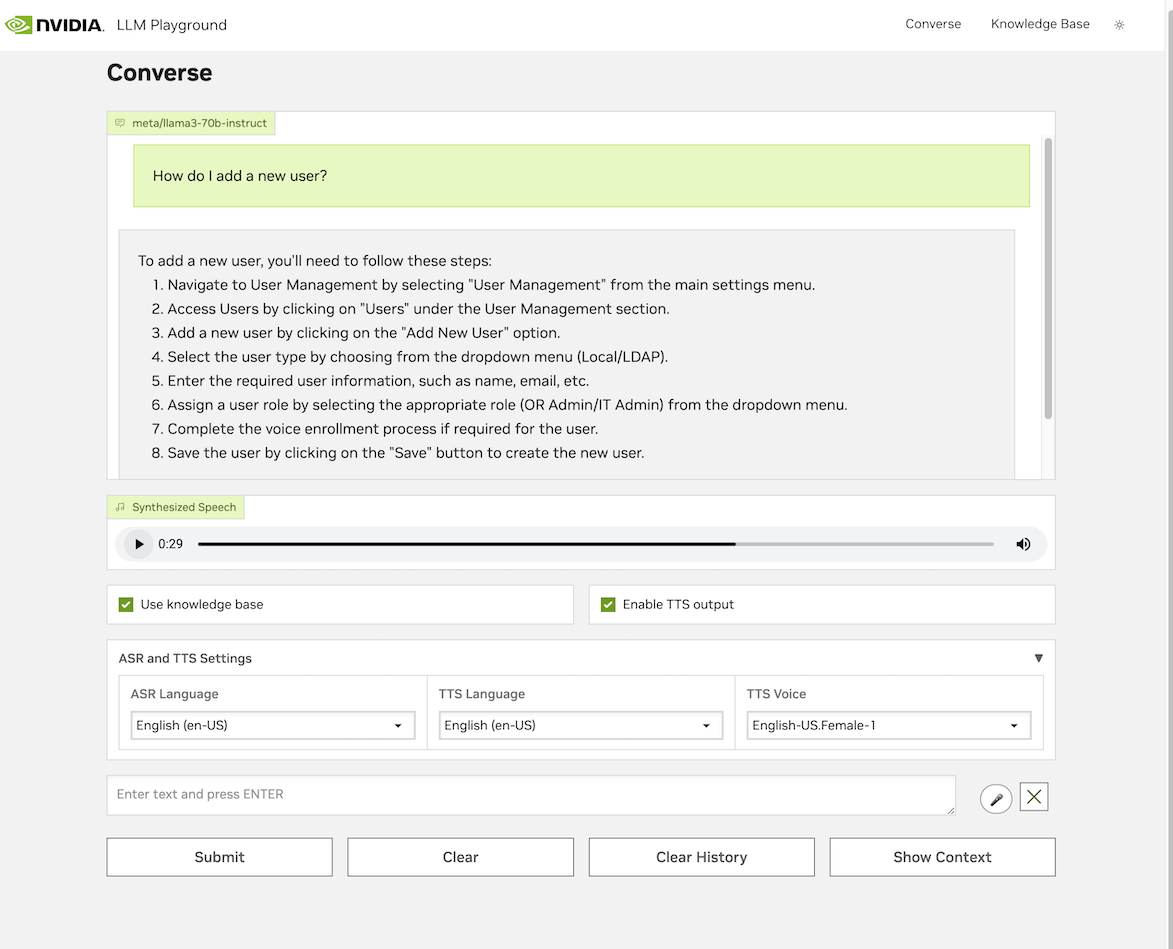